Episode 100: Total Reward = -706.0, Steps = 706, Epsilon = 0.606
Episode 200: Total Reward = -370.0, Steps = 370, Epsilon = 0.367
Episode 300: Total Reward = -232.0, Steps = 232, Epsilon = 0.222
Episode 400: Total Reward = -231.0, Steps = 231, Epsilon = 0.135
Episode 500: Total Reward = -238.0, Steps = 238, Epsilon = 0.082
Episode 600: Total Reward = -212.0, Steps = 212, Epsilon = 0.049
Episode 700: Total Reward = -161.0, Steps = 161, Epsilon = 0.030
Episode 800: Total Reward = -160.0, Steps = 160, Epsilon = 0.018
Episode 900: Total Reward = -161.0, Steps = 161, Epsilon = 0.011
Episode 1000: Total Reward = -181.0, Steps = 181, Epsilon = 0.010
Episode 1100: Total Reward = -196.0, Steps = 196, Epsilon = 0.010
Episode 1200: Total Reward = -159.0, Steps = 159, Epsilon = 0.010
Episode 1300: Total Reward = -178.0, Steps = 178, Epsilon = 0.010
Episode 1400: Total Reward = -172.0, Steps = 172, Epsilon = 0.010
Episode 1500: Total Reward = -140.0, Steps = 140, Epsilon = 0.010
Episode 1600: Total

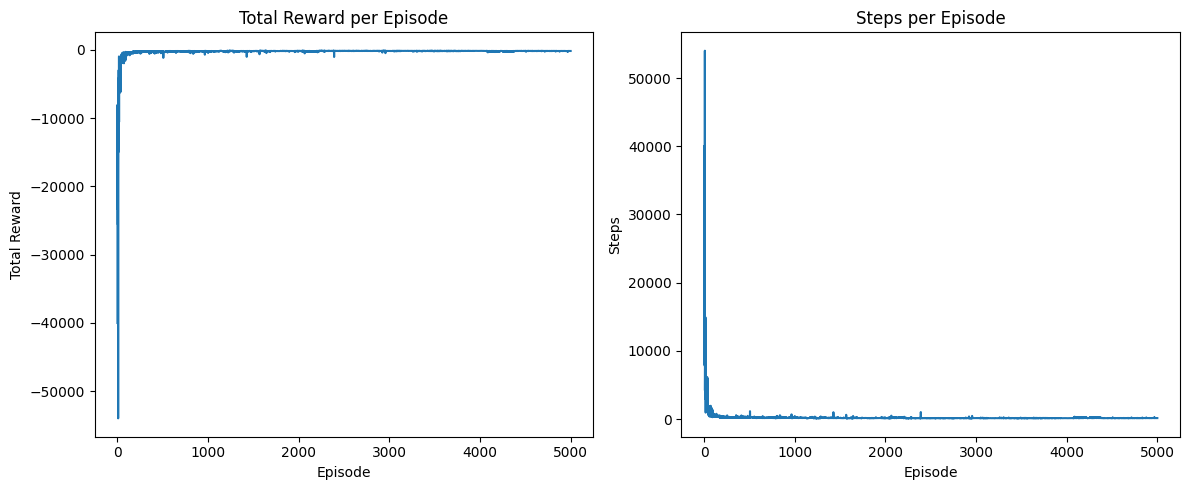

In [6]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Environment setup
env = gym.make("MountainCar-v0")

# Discretization parameters
n_position = 20  # Number of discrete positions
n_velocity = 20  # Number of discrete velocities
n_actions = env.action_space.n

def discretize_state(state, position_bins, velocity_bins):
    position, velocity = state
    position_idx = np.digitize(position, position_bins) - 1
    velocity_idx = np.digitize(velocity, velocity_bins) - 1
    return position_idx, velocity_idx

# Define bins for discretization
position_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], n_position)
velocity_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], n_velocity)

# Initialize Q-table
Q_table = np.zeros((n_position, n_velocity, n_actions))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial epsilon for epsilon-greedy
epsilon_decay = 0.995  # Decay factor for epsilon
min_epsilon = 0.01  # Minimum epsilon
episodes = 50000  # Number of training episodes

# Tracking performance
rewards_per_episode = []
steps_per_episode = []

# Q-learning algorithm
for episode in range(episodes):
    state = env.reset()[0]
    total_reward = 0
    steps = 0
    done = False

    while not done:
        position_idx, velocity_idx = discretize_state(state, position_bins, velocity_bins)

        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.choice(n_actions)  # Explore
        else:
            action = np.argmax(Q_table[position_idx, velocity_idx])  # Exploit

        next_state, reward, done, _, _ = env.step(action)
        next_position_idx, next_velocity_idx = discretize_state(next_state, position_bins, velocity_bins)

        # Q-learning update
        best_next_action = np.argmax(Q_table[next_position_idx, next_velocity_idx])
        td_target = reward + gamma * Q_table[next_position_idx, next_velocity_idx, best_next_action]
        td_error = td_target - Q_table[position_idx, velocity_idx, action]
        Q_table[position_idx, velocity_idx, action] += alpha * td_error

        state = next_state
        total_reward += reward
        steps += 1

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    rewards_per_episode.append(total_reward)
    steps_per_episode.append(steps)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}: Total Reward = {total_reward}, Steps = {steps}, Epsilon = {epsilon:.3f}")

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(1, 2, 2)
plt.plot(steps_per_episode)
plt.title('Steps per Episode')
plt.xlabel('Episode')
plt.ylabel('Steps')

plt.tight_layout()
plt.show()

env.close()
